In [1]:
# BLS API v1 url
base_url = 'https://api.bls.gov/publicAPI/v1/timeseries/data/'

In [2]:
# BLS series id for the civilian labor force participation rate
series = {'id': 'LNS11300000',
          'name': 'Labor Force Participation Rate'}

In [3]:
data_url = f'{base_url}{series["id"]}'
print(data_url)

https://api.bls.gov/publicAPI/v1/timeseries/data/LNS11300000


In [4]:
import requests

r = requests.get(data_url).json()
print('Status: ' + r['status'])

Status: REQUEST_SUCCEEDED


In [64]:
print(r.keys())

dict_keys(['status', 'responseTime', 'message', 'Results'])


In [65]:
r = r['Results']['series'][0]['data']
print(r[0])

{'year': '2025', 'period': 'M12', 'periodName': 'December', 'latest': 'true', 'value': '62.4', 'footnotes': [{}]}


In [69]:
import pandas as pd
df = pd.DataFrame(r)

In [70]:
# Combine year and period to create datetime column
df['date'] = pd.to_datetime(df['year'] + '-' + df.period.str[1:] + '-01')
# Extract footnote text
df['note'] = [i[0]['text'] if len(i[0]) > 1 else '' for i in df['footnotes']]

# Reorganize data
df = df.set_index('date')[['value', 'note']].sort_index().replace('-', None)
df['value'] = df.value.astype('float')
df.tail(3)

,value,note
date,,
2025-10-01,NaN,Data unavailable due to the 2025 lapse in appr...
2025-11-01,62.5,
2025-12-01,62.4,


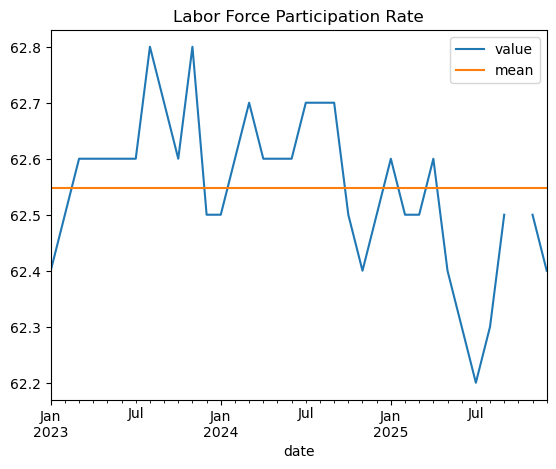

In [63]:
df['mean'] = df['value'].mean()
df[['value', 'mean']].plot(title=series['name']);